# Market Basket Analysis - Association Rule Mining
#### 1. Finding all the frequent set items: Apriori & FP Growth Algorithms.
#### 2. Finding strong associations from the frequent sets


Dataset: https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset?resource=download

Assiciation rule mining algorithms are designed to work on binary data, they calculate the frequency of items by counts 1's in the one-hot encoded matrix. So collect the raw data, group items by transaction, one-hot encode the data(TransactionEncoder from mlxtend) and run the analysis


In [ ]:
!pip install mlxtend.frequent_patterns --quite
import warnings
warnings.filterwarnings('ignore')


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quite


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
data = pd.read_csv('/content/Groceries_dataset.csv')
data.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
data.shape

(38765, 3)

In [ ]:
basket = data.groupby("Member_number")["itemDescription"].apply(list)
basket.head(5)

,itemDescription
Member_number,
1000,"[soda, canned beer, sausage, sausage, whole mi..."
1001,"[frankfurter, frankfurter, beef, sausage, whol..."
1002,"[tropical fruit, butter milk, butter, frozen v..."
1003,"[sausage, root vegetables, rolls/buns, deterge..."
1004,"[other vegetables, pip fruit, root vegetables,..."


In [ ]:
# Converting the transactions from a list-based format into a numerical array, typically a one-hot encoded format
encoder = TransactionEncoder()
te_arr = encoder.fit(basket).transform(basket)
te_arr[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
basket_df = pd.DataFrame(te_arr, columns = encoder.columns_)
basket_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
n_rows, n_items = basket_df.shape

print(f"No. of Samples  : {n_rows}")
print(f"No. of Products : {n_items}")

No. of Samples  : 3898
No. of Products : 167


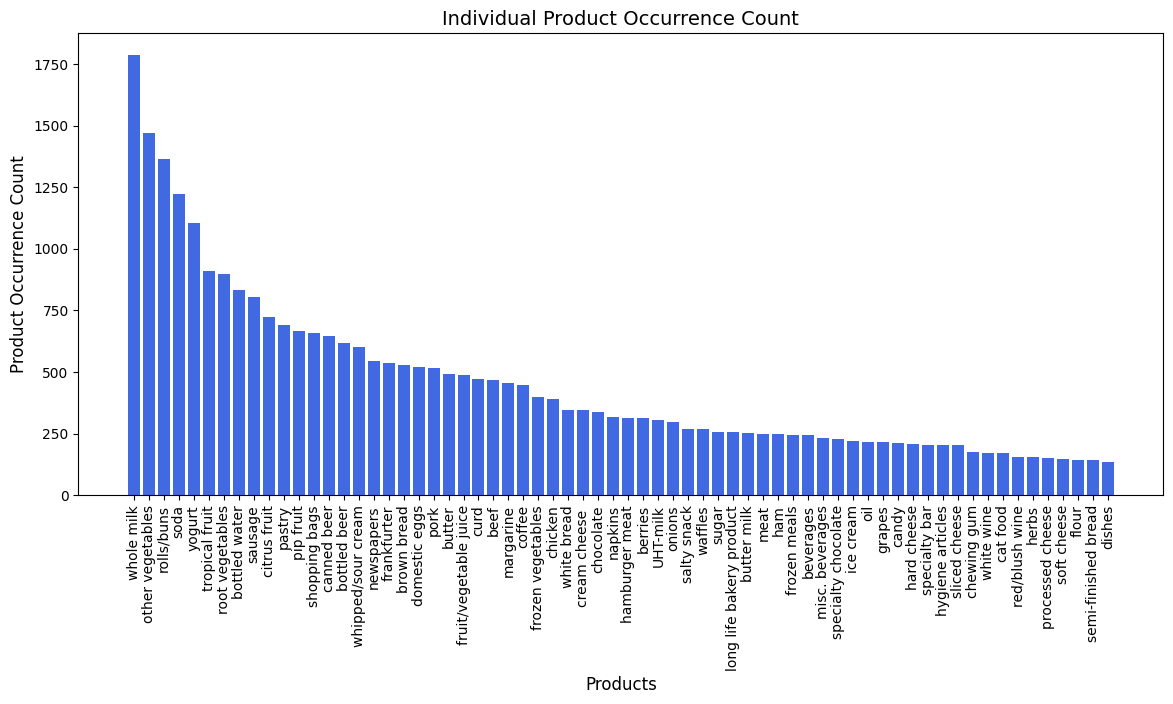

In [ ]:
items = list(basket_df.columns)
individual_item_count = [basket_df[item].sum() for item in items]

sorted_individual_item_count = sorted(individual_item_count, reverse=True)
sorted_items = [items[individual_item_count.index(value)] for value in sorted_individual_item_count]

# bar plot
plt.figure(figsize=(14,6))
plt.bar(sorted_items[:-100], sorted_individual_item_count[:-100], color="royalblue")
plt.title("Individual Product Occurrence Count", fontsize=14)
plt.xlabel("Products", fontsize=12)
plt.ylabel("Product Occurrence Count", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Computing the minimum support threshold
minimum_support= round((30/n_rows) * 5, 5)

print(f"Minimum Support Threshold: {minimum_support}")

Minimum Support Threshold: 0.03848


In [ ]:
# Apriori Method - Support, Confidence, Lift

frequent_items = apriori(basket_df, minimum_support, use_colnames = True)
frequent_items

# # FP Growth - Frequent Pattern Tree(FP Tree)
# import mlxtreme.frequent_patterns import fpgrowth
# frequent_items = fpgrowth(itemsets, minimum_support_threshold, use_colnames=True)

,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.062083,(beverages)
4,0.158799,(bottled beer)
...,...,...
265,0.040021,"(whole milk, sausage, soda)"
266,0.044895,"(whole milk, sausage, yogurt)"
267,0.039764,"(tropical fruit, whole milk, soda)"
268,0.054387,"(yogurt, whole milk, soda)"


In [ ]:
frequent_items_top_20 = frequent_items.sort_values(by = "support", ascending = False).head(20)
frequent_items_top_20 = frequent_items_top_20.reset_index(drop=True)
frequent_items_top_20

,support,itemsets
0,0.458184,(whole milk)
1,0.376603,(other vegetables)
2,0.349666,(rolls/buns)
3,0.313494,(soda)
4,0.282966,(yogurt)
5,0.233710,(tropical fruit)
6,0.230631,(root vegetables)
7,0.213699,(bottled water)
8,0.206003,(sausage)
9,0.191380,"(other vegetables, whole milk)"


In [ ]:
# Analyzing frequent pairs
top_pairs = frequent_items[frequent_items['itemsets'].apply(lambda x: len(x) == 2)].sort_values(by = "support", ascending = False)
top_pairs.head()

,support,itemsets
178,0.191380,"(other vegetables, whole milk)"
205,0.178553,"(whole milk, rolls/buns)"
225,0.151103,"(whole milk, soda)"
233,0.150590,"(whole milk, yogurt)"
171,0.146742,"(other vegetables, rolls/buns)"


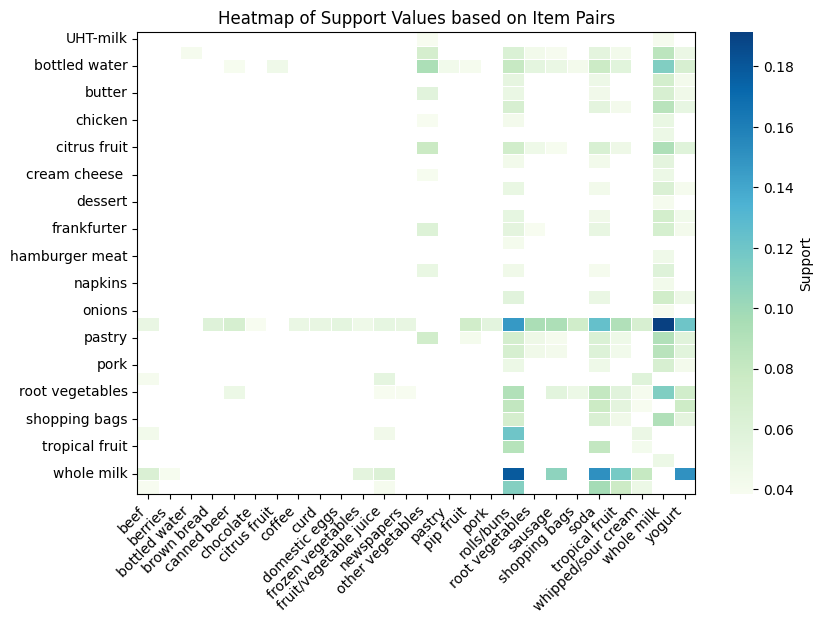

In [ ]:
top_pairs['Item 1'] = top_pairs['itemsets'].apply(lambda x: list(x)[0])
top_pairs['Item 2'] = top_pairs['itemsets'].apply(lambda x: list(x)[1])

heatmap_data = pd.crosstab(top_pairs['Item 1'], top_pairs['Item 2'], values = top_pairs['support'], aggfunc= 'mean', dropna = True)

plt.figure(figsize = (9,6))
sns.heatmap(heatmap_data, cmap = 'GnBu', annot = False, fmt = '.1f', cbar_kws = {'label':'Support'}, linewidths = 0.5)
plt.title("Heatmap of Support Values based on Item Pairs")
plt.xticks(rotation = 45, ha = 'right')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.xlabel('')
plt.ylabel('')
plt.show()

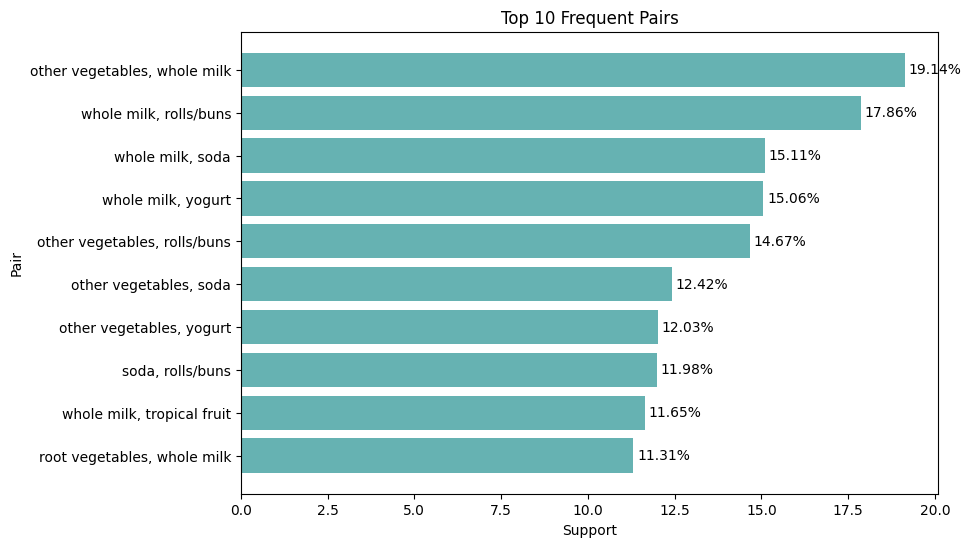

In [ ]:
top_pairs = frequent_items[frequent_items['itemsets'].apply(lambda x: len(x) == 2)].sort_values(by = "support", ascending = False).head(10)

top_pairs['itemsets'] = top_pairs['itemsets'].apply(lambda x: ', '.join(list(x)))
pairs = top_pairs['itemsets']
support_values = top_pairs['support']*100

plt.figure(figsize = (9,6))
bars = plt.barh(pairs, support_values, color = '#66b2b2')
for bar in bars:
  plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
           f'{bar.get_width():.2f}%', va = 'center', ha='left', color = 'black', fontsize = 10)
plt.xlabel('Support')
plt.ylabel('Pair')
plt.title('Top 10 Frequent Pairs')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Our goal is to find lengths of 2 or more
lengths = [len(itemset) for itemset in frequent_items['itemsets']]
frequent_items[[val > 2 for val in lengths]]

,support,itemsets
234,0.038738,"(bottled beer, other vegetables, whole milk)"
235,0.056183,"(bottled water, other vegetables, whole milk)"
236,0.045151,"(bottled water, whole milk, rolls/buns)"
237,0.040021,"(bottled water, whole milk, soda)"
238,0.040277,"(bottled water, whole milk, yogurt)"
239,0.042586,"(citrus fruit, other vegetables, whole milk)"
240,0.039764,"(citrus fruit, whole milk, rolls/buns)"
241,0.041816,"(pastry, other vegetables, whole milk)"
242,0.039764,"(other vegetables, pip fruit, whole milk)"
243,0.041303,"(other vegetables, root vegetables, rolls/buns)"


In [ ]:
frequent_items.groupby(lengths)['support'].describe()

,count,mean,std,min,25%,50%,75%,max
1,63.0,0.120359,0.087677,0.038481,0.060544,0.086455,0.147255,0.458184
2,171.0,0.062010,0.026590,0.038481,0.043612,0.053617,0.070036,0.191380
3,36.0,0.048052,0.010593,0.038738,0.041047,0.043099,0.050988,0.082093


In [ ]:
rules = association_rules(frequent_items, metric = 'confidence', min_threshold = 0.25)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(UHT-milk),(other vegetables),0.078502,0.376603,0.038994,0.496732,1.318979,1.0,0.009430,1.238697,0.262440,0.093711,0.192700,0.300137
1,(UHT-milk),(whole milk),0.078502,0.458184,0.040534,0.516340,1.126928,1.0,0.004565,1.120242,0.122227,0.081696,0.107336,0.302403
2,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,1.0,0.005773,1.083966,0.129082,0.114055,0.077462,0.279885
3,(beef),(rolls/buns),0.119548,0.349666,0.040534,0.339056,0.969655,1.0,-0.001268,0.983946,-0.034324,0.094554,-0.016316,0.227488
4,(beef),(soda),0.119548,0.313494,0.042842,0.358369,1.143145,1.0,0.005365,1.069939,0.142223,0.109796,0.065367,0.247515


In [ ]:
print("Total number of Assiciation Rules",rules.shape[0])

Total number of Assiciation Rules 281


In [ ]:
# Seeing how many rules are there with antecedents as rolls/buns
rules[rules['antecedents'] == {'rolls/buns'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
102,(rolls/buns),(other vegetables),0.349666,0.376603,0.146742,0.419663,1.114335,1.0,0.015056,1.074197,0.157772,0.253209,0.069072,0.404654
132,(rolls/buns),(root vegetables),0.349666,0.230631,0.090816,0.259721,1.126133,1.0,0.010172,1.039296,0.172227,0.185535,0.037810,0.326746
136,(rolls/buns),(soda),0.349666,0.313494,0.119805,0.342627,1.092928,1.0,0.010187,1.044316,0.130743,0.220491,0.042436,0.362393
138,(rolls/buns),(tropical fruit),0.349666,0.233710,0.088250,0.252384,1.079906,1.0,0.006530,1.024979,0.113778,0.178238,0.024370,0.314996
141,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,1.0,0.018342,1.107190,0.157955,0.283734,0.096813,0.450168
143,(rolls/buns),(yogurt),0.349666,0.282966,0.111339,0.318415,1.125279,1.0,0.012396,1.052011,0.171191,0.213583,0.049439,0.355944


In [ ]:
# Seeing how many rules are there with consequents as rolls/buns
rules[rules['consequents'] == {'rolls/buns'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(beef),(rolls/buns),0.119548,0.349666,0.040534,0.339056,0.969655,1.0,-0.001268,0.983946,-0.034324,0.094554,-0.016316,0.227488
10,(bottled beer),(rolls/buns),0.158799,0.349666,0.063109,0.397415,1.136555,1.0,0.007582,1.079240,0.142829,0.141705,0.073422,0.288950
18,(bottled water),(rolls/buns),0.213699,0.349666,0.079271,0.370948,1.060863,1.0,0.004548,1.033832,0.072964,0.163752,0.032725,0.298827
26,(brown bread),(rolls/buns),0.135967,0.349666,0.053361,0.392453,1.122363,1.0,0.005818,1.070425,0.126179,0.123442,0.065791,0.272529
31,(butter),(rolls/buns),0.126475,0.349666,0.049513,0.391481,1.119583,1.0,0.005288,1.068715,0.122275,0.116055,0.064297,0.266540
36,(canned beer),(rolls/buns),0.165213,0.349666,0.066701,0.403727,1.154605,1.0,0.008931,1.090663,0.160404,0.148827,0.083127,0.297241
43,(chicken),(rolls/buns),0.100564,0.349666,0.042329,0.420918,1.203771,1.0,0.007165,1.123043,0.188204,0.103774,0.109562,0.270987
48,(citrus fruit),(rolls/buns),0.185480,0.349666,0.071832,0.387275,1.107556,1.0,0.006976,1.061380,0.119225,0.155039,0.057830,0.296352
54,(coffee),(rolls/buns),0.114931,0.349666,0.042842,0.372768,1.066067,1.0,0.002655,1.036831,0.070020,0.101582,0.035522,0.247646
60,(curd),(rolls/buns),0.120831,0.349666,0.050026,0.414013,1.184022,1.0,0.007775,1.109808,0.176782,0.118975,0.098943,0.278540


In [ ]:
# Looking at Rules where Antecedents are more than 1

rules[rules['antecedents'].str.len()>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
179,"(bottled beer, other vegetables)",(whole milk),0.068497,0.458184,0.038738,0.565543,1.234315,1.0,0.007354,1.247112,0.203793,0.079390,0.198147,0.325045
180,"(bottled beer, whole milk)",(other vegetables),0.085428,0.376603,0.038738,0.453453,1.204061,1.0,0.006565,1.140610,0.185308,0.091515,0.123276,0.278157
181,"(bottled water, other vegetables)",(whole milk),0.093894,0.458184,0.056183,0.598361,1.305941,1.0,0.013162,1.349012,0.258544,0.113295,0.258717,0.360491
182,"(bottled water, whole milk)",(other vegetables),0.112365,0.376603,0.056183,0.500000,1.327657,1.0,0.013865,1.246793,0.278035,0.129816,0.197942,0.324591
183,"(other vegetables, whole milk)",(bottled water),0.191380,0.213699,0.056183,0.293566,1.373732,1.0,0.015285,1.113056,0.336445,0.161029,0.101572,0.278235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,"(soda, yogurt)",(whole milk),0.097486,0.458184,0.054387,0.557895,1.217622,1.0,0.009720,1.225537,0.198033,0.108495,0.184031,0.338298
277,"(whole milk, soda)",(yogurt),0.151103,0.282966,0.054387,0.359932,1.271999,1.0,0.011630,1.120247,0.251899,0.143243,0.107340,0.276068
278,"(whole milk, yogurt)",(tropical fruit),0.150590,0.233710,0.042329,0.281090,1.202733,1.0,0.007135,1.065906,0.198444,0.123781,0.061831,0.231105
279,"(tropical fruit, yogurt)",(whole milk),0.075680,0.458184,0.042329,0.559322,1.220738,1.0,0.007654,1.229506,0.195628,0.086117,0.186665,0.325854


In [ ]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.0,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,0.161219,0.343690,0.061475,0.400553,1.167713,1.0,0.008136,1.103497,0.166119,0.135517,0.090400,0.293450
std,0.078014,0.081529,0.028033,0.097086,0.079446,0.0,0.003724,0.070321,0.063872,0.040893,0.053605,0.049252
min,0.066444,0.191380,0.038481,0.250000,0.969655,1.0,-0.001268,0.983946,-0.034324,0.078704,-0.016316,0.216650
25%,0.113135,0.282966,0.042842,0.326489,1.114484,1.0,0.005818,1.053627,0.128418,0.110309,0.050897,0.252864
50%,0.139815,0.349666,0.050795,0.393771,1.152042,1.0,0.007481,1.082399,0.160094,0.124910,0.076126,0.288814
75%,0.178553,0.376603,0.069523,0.471810,1.217528,1.0,0.009548,1.136802,0.203992,0.152644,0.120339,0.324591
max,0.458184,0.458184,0.191380,0.606178,1.483093,1.0,0.020940,1.375788,0.364754,0.297448,0.273144,0.462934


In [ ]:
rules = rules[['antecedents','consequents','antecedent support','consequent support','support','confidence','lift','leverage']].sort_values(by = 'lift', ascending = False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage
269,"(sausage, whole milk)",(yogurt),0.106978,0.282966,0.044895,0.419664,1.483093,0.014624
270,"(whole milk, yogurt)",(sausage),0.150590,0.206003,0.044895,0.298126,1.447192,0.013873
206,"(other vegetables, rolls/buns)",(sausage),0.146742,0.206003,0.041816,0.284965,1.383305,0.011587
184,(bottled water),"(other vegetables, whole milk)",0.213699,0.191380,0.056183,0.262905,1.373732,0.015285
183,"(other vegetables, whole milk)",(bottled water),0.191380,0.213699,0.056183,0.293566,1.373732,0.015285
...,...,...,...,...,...,...,...,...
127,(pork),(rolls/buns),0.132376,0.349666,0.047460,0.358527,1.025340,0.001173
42,(chicken),(other vegetables),0.100564,0.376603,0.038738,0.385204,1.022838,0.000865
164,(whipped/sour cream),(soda),0.154695,0.313494,0.048486,0.313433,0.999805,-0.000009
91,(newspapers),(other vegetables),0.139815,0.376603,0.051565,0.368807,0.979299,-0.001090


In [ ]:
# Lets look at the normalized version of lift - leverage
rules.sort_values('leverage', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage
177,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940
178,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940
112,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827
111,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827
141,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342


In [ ]:
rules['rule'] = rules['antecedents'].apply(lambda x: ', '.join(list(x))) + ' -> ' + rules['consequents'].apply(lambda x: ', '.join(list(x)))
rules = rules[['rule'] + [col for col in rules.columns if col != 'rule']]
rules = rules.reset_index(drop = True)
rules

,rule,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage
0,"sausage, whole milk -> yogurt","(sausage, whole milk)",(yogurt),0.106978,0.282966,0.044895,0.419664,1.483093,0.014624
1,"whole milk, yogurt -> sausage","(whole milk, yogurt)",(sausage),0.150590,0.206003,0.044895,0.298126,1.447192,0.013873
2,"other vegetables, rolls/buns -> sausage","(other vegetables, rolls/buns)",(sausage),0.146742,0.206003,0.041816,0.284965,1.383305,0.011587
3,"bottled water -> other vegetables, whole milk",(bottled water),"(other vegetables, whole milk)",0.213699,0.191380,0.056183,0.262905,1.373732,0.015285
4,"other vegetables, whole milk -> bottled water","(other vegetables, whole milk)",(bottled water),0.191380,0.213699,0.056183,0.293566,1.373732,0.015285
...,...,...,...,...,...,...,...,...,...
276,pork -> rolls/buns,(pork),(rolls/buns),0.132376,0.349666,0.047460,0.358527,1.025340,0.001173
277,chicken -> other vegetables,(chicken),(other vegetables),0.100564,0.376603,0.038738,0.385204,1.022838,0.000865
278,whipped/sour cream -> soda,(whipped/sour cream),(soda),0.154695,0.313494,0.048486,0.313433,0.999805,-0.000009
279,newspapers -> other vegetables,(newspapers),(other vegetables),0.139815,0.376603,0.051565,0.368807,0.979299,-0.001090


This shows that the customer who buys sausage, whole milk is 1.48 more likely to buy yogurt also.

In [ ]:
rules[(rules['lift'] > 1) & (rules['confidence'] > 0.5)]

,rule,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
5,"sausage, rolls/buns -> other vegetables","(sausage, rolls/buns)",(other vegetables),0.082350,0.376603,0.041816,0.507788,1.348337
12,"bottled water, yogurt -> whole milk","(bottled water, yogurt)",(whole milk),0.066444,0.458184,0.040277,0.606178,1.323001
14,"shopping bags, rolls/buns -> whole milk","(shopping bags, rolls/buns)",(whole milk),0.068753,0.458184,0.041303,0.600746,1.311147
15,"bottled water, other vegetables -> whole milk","(bottled water, other vegetables)",(whole milk),0.093894,0.458184,0.056183,0.598361,1.305941
18,"other vegetables, yogurt -> whole milk","(other vegetables, yogurt)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003
19,"sausage, yogurt -> whole milk","(sausage, yogurt)",(whole milk),0.075423,0.458184,0.044895,0.595238,1.299125
23,"rolls/buns, yogurt -> whole milk","(rolls/buns, yogurt)",(whole milk),0.111339,0.458184,0.065931,0.592166,1.292420
24,"sausage, rolls/buns -> whole milk","(sausage, rolls/buns)",(whole milk),0.082350,0.458184,0.048743,0.591900,1.291841
28,"other vegetables, shopping bags -> whole milk","(other vegetables, shopping bags)",(whole milk),0.073114,0.458184,0.042842,0.585965,1.278886
30,"pastry, other vegetables -> whole milk","(pastry, other vegetables)",(whole milk),0.071575,0.458184,0.041816,0.584229,1.275099
